# Q1

In [1]:
library('psych')

- https://www.geo.fu-berlin.de/en/v/soga/Geodata-analysis/factor-analysis/A-simple-example-of-FA/index.html
- http://rtutorialseries.blogspot.com/2011/10/r-tutorial-series-exploratory-factor.html

In [2]:
q1.cov <- matrix(c(1, 0.63, 0.45, 0.63, 1, 0.35, 0.45, 0.35, 1), nrow=3, ncol=3, byrow=TRUE)

## Q1(a)

In [3]:
q1.fa <- factanal(covmat=q1.cov, factors=1, rotation='none')
q1.fa


Call:
factanal(factors = 1, covmat = q1.cov, rotation = "none")

Uniquenesses:
[1] 0.19 0.51 0.75

Loadings:
     Factor1
[1,] 0.9    
[2,] 0.7    
[3,] 0.5    

               Factor1
SS loadings      1.550
Proportion Var   0.517

The degrees of freedom for the model is 0 and the fit was 0 

## Q1(b)

### Q1(b)(i) Communalities

In [4]:
q1.fa$comm <- apply(q1.fa$loadings^2,1,sum)
q1.fa$comm

[1] 0.8099963 0.4900011 0.2500008

h1 have the greatest weight among all other factors.
The communalities are those parts of the vairances of the variables explained by the single factor.

### Q1(b)(ii) Corr

In [5]:
q1.fa$loadings


Loadings:
     Factor1
[1,] 0.9    
[2,] 0.7    
[3,] 0.5    

               Factor1
SS loadings      1.550
Proportion Var   0.517

Z1 carry the most weight.

## Q1(c)

In [6]:
q1.eigen <- eigen(q1.cov)
q1.eigen

eigen() decomposition
$values
[1] 1.9632830 0.6794930 0.3572239

$vectors
           [,1]       [,2]       [,3]
[1,] -0.6250027  0.2186276  0.7493822
[2,] -0.5931510  0.4910833 -0.6379726
[3,] -0.5074875 -0.8432314 -0.1772492


### Q1(c)(i)

In [7]:
q1.pc <- sqrt(q1.eigen$values[1]) * q1.eigen$vectors[,1]
q1.pc
q1.fa$loadings

[1] -0.8757363 -0.8311066 -0.7110772


Loadings:
     Factor1
[1,] 0.9    
[2,] 0.7    
[3,] 0.5    

               Factor1
SS loadings      1.550
Proportion Var   0.517

Slightly different.

### Q1(c)(ii)

In [8]:
print('Proportion:')
for (s in q1.eigen$values) {
  print(s / sum(q1.eigen$values))
}

q1.pc.first_proportion <- q1.eigen$values[1] / sum(q1.eigen$values)
q1.pc.first_proportion

[1] "Proportion:"
[1] 0.6544277
[1] 0.2264977
[1] 0.1190746


[1] 0.6544277

# Q2

In [9]:
path <- '../data/pollution.csv'
q2 <- read.csv(path, fileEncoding="UTF-8-BOM")
head(q2)

x1,x2,x3,x4,x5,x6,x7
8,98,7,2,12,8,2
7,107,4,3,9,5,3
7,103,4,3,5,6,3
10,88,5,2,8,15,4
6,91,4,2,8,10,3
8,90,5,2,12,12,4


## Q2(a)

In [10]:
q2 <- q2[, c(1,2,5,6)]

In [11]:
q2.cov.fa.a1 <- fa(r=q2, covar = TRUE, nfactors = 1, fm='ml', rotate='none', scores='regression')
q2.cov.fa.a1

Factor Analysis using method =  ml
Call: fa(r = q2, nfactors = 1, rotate = "none", scores = "regression", 
    covar = TRUE, fm = "ml")
Unstandardized loadings (pattern matrix) based upon covariance matrix
     ML1      h2   u2    H2   U2
x1 -0.19   0.035  2.5 0.014 0.99
x2 16.39 268.483 32.0 0.893 0.11
x5  0.44   0.190 11.2 0.017 0.98
x6  1.91   3.636 27.3 0.117 0.88

                  ML1
SS loadings    272.34
Proportion Var   0.79

 Standardized loadings (pattern matrix)
   V   ML1    h2   u2
x1 1 -0.12 0.014 0.99
x2 2  0.95 0.893 0.11
x5 3  0.13 0.017 0.98
x6 4  0.34 0.117 0.88

                ML1
SS loadings    3.15
Proportion Var 0.79

Mean item complexity =  1
Test of the hypothesis that 1 factor is sufficient.

The degrees of freedom for the null model are  6  and the objective function was  329.08 with Chi Square of  12779.43
The degrees of freedom for the model are 2  and the objective function was  0.08 

The root mean square of the residuals (RMSR) is  1.26 
The df correct

In [12]:
q2.cov.fa.a2 <- fa(r=q2, covar = TRUE, nfactors = 2, fm='ml', rotate='none', scores='regression')
q2.cov.fa.a2

Factor Analysis using method =  ml
Call: fa(r = q2, nfactors = 2, rotate = "none", scores = "regression", 
    covar = TRUE, fm = "ml")
Unstandardized loadings (pattern matrix) based upon covariance matrix
     ML1   ML2     h2   u2    H2   U2
x1 -0.20 -0.64   0.45  2.1 0.179 0.82
x2 16.37 -0.79 268.64 31.9 0.894 0.11
x5  0.45  0.78   0.80 10.6 0.071 0.93
x6  2.02  2.86  12.26 18.7 0.396 0.60

                         ML1  ML2
SS loadings           272.34 9.81
Proportion Var          0.79 0.03
Cumulative Var          0.79 0.82
Proportion Explained    0.97 0.03
Cumulative Proportion   0.97 1.00

 Standardized loadings (pattern matrix)
   item   ML1   ML2    h2   u2
x1    1 -0.13 -0.40 0.179 0.82
x2    2  0.94 -0.05 0.894 0.11
x5    3  0.13  0.23 0.071 0.93
x6    4  0.36  0.51 0.396 0.60

                 ML1  ML2
SS loadings     1.06 0.48
Proportion Var  0.26 0.12
Cumulative Var  0.26 0.38
Cum. factor Var 0.69 1.00

Mean item complexity =  1.4
Test of the hypothesis that 2 factors are s

## Q2(b)

In [14]:
q2.cov.fa.b2 <- fa(r=q2, covar = TRUE, nfactors = 2, fm='ml', rotate='varimax', scores='regression')
q2.cov.fa.b2

Factor Analysis using method =  ml
Call: fa(r = q2, nfactors = 2, rotate = "varimax", scores = "regression", 
    covar = TRUE, fm = "ml")
Unstandardized loadings (pattern matrix) based upon covariance matrix
     ML1   ML2     h2   u2    H2   U2
x1 -0.04 -0.67   0.45  2.1 0.179 0.82
x2 16.06  3.27 268.64 31.9 0.894 0.11
x5  0.25  0.86   0.80 10.6 0.071 0.93
x6  1.25  3.27  12.26 18.7 0.396 0.60

                         ML1   ML2
SS loadings           259.55 22.60
Proportion Var          0.75  0.07
Cumulative Var          0.75  0.82
Proportion Explained    0.92  0.08
Cumulative Proportion   0.92  1.00

 Standardized loadings (pattern matrix)
   item   ML1   ML2    h2   u2
x1    1 -0.02 -0.42 0.179 0.82
x2    2  0.93  0.19 0.894 0.11
x5    3  0.07  0.26 0.071 0.93
x6    4  0.22  0.59 0.396 0.60

                 ML1  ML2
SS loadings     0.91 0.62
Proportion Var  0.23 0.16
Cumulative Var  0.23 0.38
Cum. factor Var 0.59 1.00

Mean item complexity =  1.1
Test of the hypothesis that 2 fact

When we see the plot, so we know how it rotates.

observe the distributions

In [17]:
q2.cov.fa.b2 <- fa(r=q2, covar = TRUE, nfactors = 2, fm='ml', rotate='varimax', scores='Bartlett')
q2.cov.fa.b2

Factor Analysis using method =  ml
Call: fa(r = q2, nfactors = 2, rotate = "varimax", scores = "Bartlett", 
    covar = TRUE, fm = "ml")
Unstandardized loadings (pattern matrix) based upon covariance matrix
     ML1   ML2     h2   u2    H2   U2
x1 -0.04 -0.67   0.45  2.1 0.179 0.82
x2 16.06  3.27 268.64 31.9 0.894 0.11
x5  0.25  0.86   0.80 10.6 0.071 0.93
x6  1.25  3.27  12.26 18.7 0.396 0.60

                         ML1   ML2
SS loadings           259.55 22.60
Proportion Var          0.75  0.07
Cumulative Var          0.75  0.82
Proportion Explained    0.92  0.08
Cumulative Proportion   0.92  1.00

 Standardized loadings (pattern matrix)
   item   ML1   ML2    h2   u2
x1    1 -0.02 -0.42 0.179 0.82
x2    2  0.93  0.19 0.894 0.11
x5    3  0.07  0.26 0.071 0.93
x6    4  0.22  0.59 0.396 0.60

                 ML1  ML2
SS loadings     0.91 0.62
Proportion Var  0.23 0.16
Cumulative Var  0.23 0.38
Cum. factor Var 0.59 1.00

Mean item complexity =  1.1
Test of the hypothesis that 2 factor

### Q2(C)

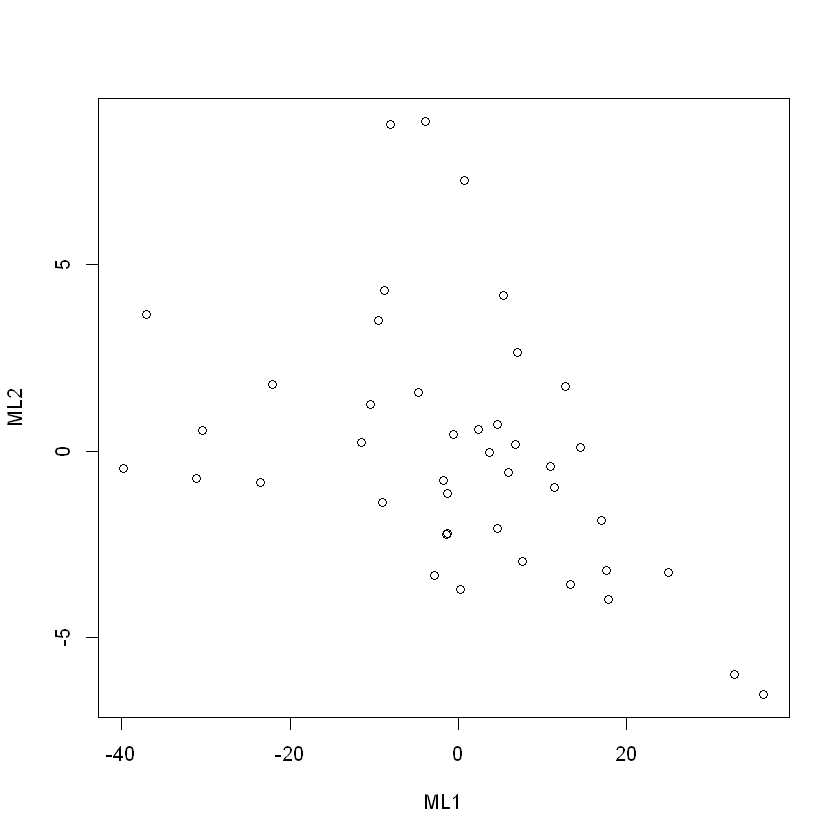

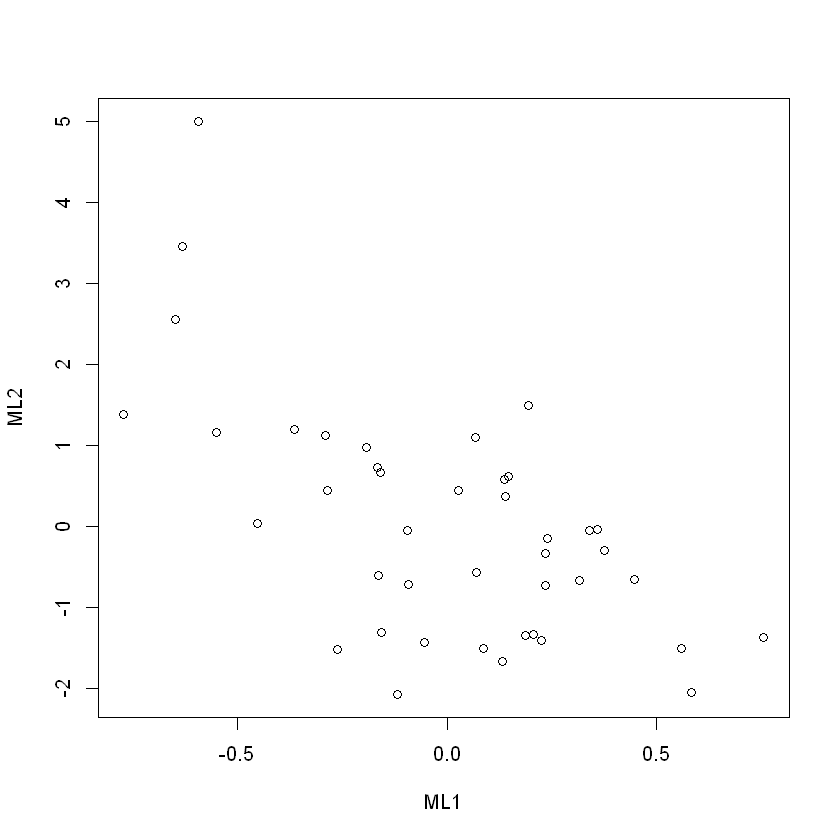

In [30]:
q2.cov.fa.c2 <- fa(r=q2, covar = TRUE, nfactors = 2, fm='ml', rotate='none', scores='regression')
plot(q2.cov.fa.c2$scores)

q2.cov.fa.c2 <- fa(r=q2, covar = TRUE, nfactors = 2, fm='ml', rotate='none', scores='Bartlett')
plot(q2.cov.fa.c2$scores)

## Q2(d)

Factor Analysis using method =  ml
Call: fa(r = q2, nfactors = 1, rotate = "none", scores = "regression", 
    covar = FALSE, fm = "ml")
Standardized loadings (pattern matrix) based upon correlation matrix
     ML1    h2   u2 com
x1 -0.32 0.105 0.89   1
x2  0.41 0.168 0.83   1
x5  0.23 0.054 0.95   1
x6  0.77 0.595 0.41   1

                ML1
SS loadings    0.92
Proportion Var 0.23

Mean item complexity =  1
Test of the hypothesis that 1 factor is sufficient.

The degrees of freedom for the null model are  6  and the objective function was  0.21 with Chi Square of  8.23
The degrees of freedom for the model are 2  and the objective function was  0 

The root mean square of the residuals (RMSR) is  0.02 
The df corrected root mean square of the residuals is  0.04 

The harmonic number of observations is  42 with the empirical chi square  0.23  with prob <  0.89 
The total number of observations was  42  with Likelihood Chi Square =  0.15  with prob <  0.93 

Tucker Lewis Index of facto

Factor Analysis using method =  ml
Call: fa(r = q2, nfactors = 2, rotate = "none", scores = "regression", 
    covar = FALSE, fm = "ml")
Standardized loadings (pattern matrix) based upon correlation matrix
     ML1   ML2    h2   u2 com
x1 -0.38  0.32 0.248 0.75 2.0
x2  0.50  0.27 0.323 0.68 1.5
x5  0.25 -0.04 0.067 0.93 1.1
x6  0.65 -0.02 0.425 0.58 1.0

                       ML1  ML2
SS loadings           0.88 0.18
Proportion Var        0.22 0.05
Cumulative Var        0.22 0.27
Proportion Explained  0.83 0.17
Cumulative Proportion 0.83 1.00

Mean item complexity =  1.4
Test of the hypothesis that 2 factors are sufficient.

The degrees of freedom for the null model are  6  and the objective function was  0.21 with Chi Square of  8.23
The degrees of freedom for the model are -1  and the objective function was  0 

The root mean square of the residuals (RMSR) is  0 
The df corrected root mean square of the residuals is  NA 

The harmonic number of observations is  42 with the empirical 

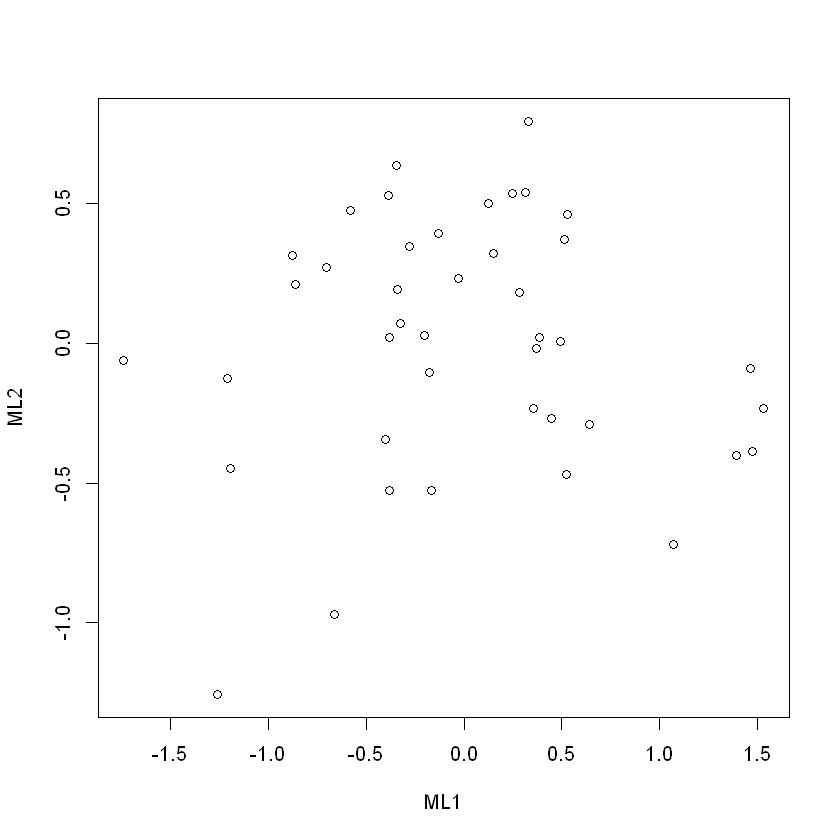

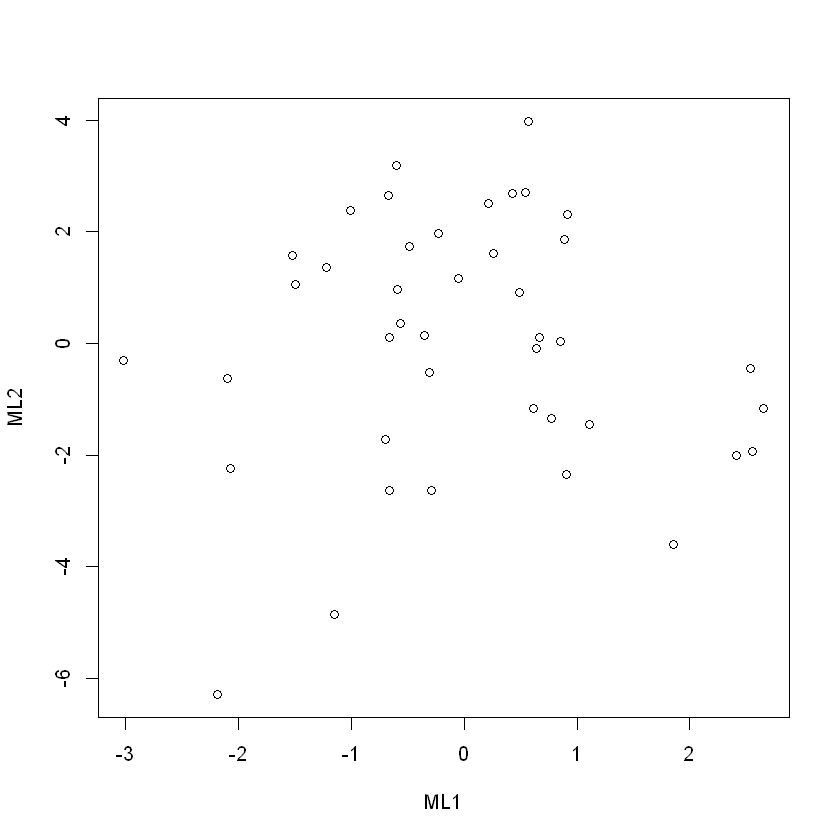

In [28]:
q2.cor <- cor(q2)
q2.cor.fa.a1 <- fa(r=q2, covar = FALSE, nfactors = 1, fm='ml', rotate='none', scores='regression')
q2.cor.fa.a1
q2.cor.fa.a2 <- fa(r=q2, covar = FALSE, nfactors = 2, fm='ml', rotate='none', scores='regression')
q2.cor.fa.a2

q2.cor.fa.c2 <- fa(r=q2, covar = FALSE, nfactors = 2, fm='ml', rotate='none', scores='regression')
plot(q2.cor.fa.c2$scores)
q2.cor.fa.c2 <- fa(r=q2, covar = FALSE, nfactors = 2, fm='ml', rotate='none', scores='Bartlett')
plot(q2.cor.fa.c2$scores)

Usually people use 1 and 2 factors in general. Varimax Rotation is to see if there's rotation, will it be having a different result.

Using correlation will be having a standardized, the scores is more random.

Rotation is to group the variables together to sharpen the contributions when it's on a lower dimension.
References book prefer to use MLE instead of PCA.